In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 회귀분석
from statsmodels.formula.api import ols
# 회귀분석 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# data split
from sklearn.model_selection import train_test_split
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
# 규제화 패키지
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 변수 선택법
from sklearn.feature_selection import RFE
# Scale 변환
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


['NanumSquare',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumBarunpen',
 'Nanum Pen Script',
 'NanumBarunpen',
 'NanumSquareRound',
 'NanumGothic',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothicCoding',
 'NanumGothic',
 'NanumSquare',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumGothicCoding',
 'Nanum Brush Script',
 'NanumGothic Eco',
 'NanumBarunGothic',
 'NanumGothic Eco',
 'NanumGothic',
 'Nanum Brush Script',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumGothic',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquare',
 'NanumGothic Eco',
 'NanumGothicCoding',
 'NanumMyeongjo Eco',
 'NanumSquar

In [4]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

# 실습과제 1

## 데이터 불러오기

In [5]:
df = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/체질검사.csv', encoding = 'utf-8')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


#### BMI 계산

In [6]:
# 단위 변환
df['WEIGHT_KG']=0.45*df['WEIGHT']
df['HEIGHT_M']=((2.54)/100)*df['HEIGHT']
df['BMI'] = 0.45*df['WEIGHT']/(((2.54)/100)*df['HEIGHT']*((2.54)/100)*df['HEIGHT'])
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,WEIGHT_KG,HEIGHT_M,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,163.4175,1.83515,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,75.6000,1.80975,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,79.9875,1.73990,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,66.4875,1.67005,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,98.5500,1.62560,37.293165


In [7]:
df_new = df.iloc[:,14:]
df_new['FAT'] = df['FAT']
df_new.head()

,WEIGHT_KG,HEIGHT_M,BMI,FAT
0,163.4175,1.83515,48.523870,35.2
1,75.6000,1.80975,23.082595,11.8
2,79.9875,1.73990,26.422478,22.2
3,66.4875,1.67005,23.838617,10.6
4,98.5500,1.62560,37.293165,47.5


## 변수 간의 경향성 파악

### 산점도 분석

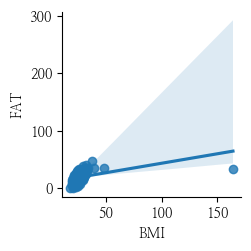

In [8]:
sns.pairplot(df_new, y_vars = 'FAT', x_vars='BMI', kind='reg')

* 이상치로 인해 경향성이 잘 나타나지 않는다.

#### 이상치 제거

In [9]:
df_new['BMI'].sort_index()
df_new.sort_values(by = "BMI", ascending = False, inplace = True)
df_new

,WEIGHT_KG,HEIGHT_M,BMI,FAT
78,92.2500,0.74930,164.306562,32.9
0,163.4175,1.83515,48.523870,35.2
82,118.2375,1.74625,38.774160,34.5
4,98.5500,1.62560,37.293165,47.5
117,101.0250,1.73355,33.616780,35.0
...,...,...,...,...
17,63.0000,1.79070,19.646938,15.1
230,65.7000,1.83515,19.508426,10.1
53,64.6875,1.84150,19.075544,5.3
174,56.3625,1.72720,18.893177,7.7


> 78번 data는 다른 data와 달리 키와 몸무게가 FAT지표와 잘 맞지 않는다  
> 따라서 이상치로 판단하여 제거하였다.

In [10]:
df_new['BMI'][78]

164.30656245397523

In [11]:
df_new.drop([78], inplace = True)

In [12]:
df_new.reset_index(inplace = True)
df_new

,index,WEIGHT_KG,HEIGHT_M,BMI,FAT
0,0,163.4175,1.83515,48.523870,35.2
1,82,118.2375,1.74625,38.774160,34.5
2,4,98.5500,1.62560,37.293165,47.5
3,117,101.0250,1.73355,33.616780,35.0
4,31,102.7125,1.76530,32.959928,34.3
...,...,...,...,...,...
246,17,63.0000,1.79070,19.646938,15.1
247,230,65.7000,1.83515,19.508426,10.1
248,53,64.6875,1.84150,19.075544,5.3
249,174,56.3625,1.72720,18.893177,7.7


#### 제거 후 산점도 분석

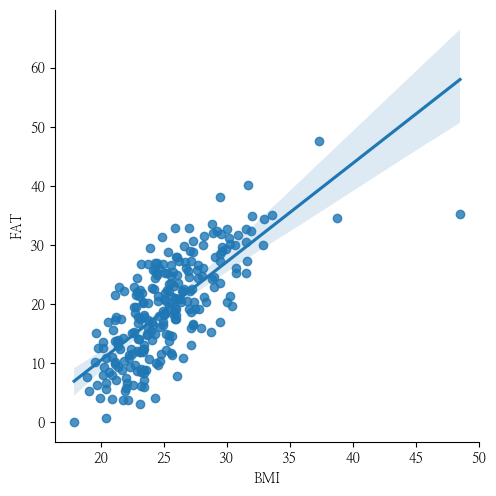

In [13]:
sns.pairplot(df_new, y_vars = 'FAT', x_vars='BMI', kind='reg', height = 5)

* 이상치 제거 후 산점도 분석 결과, 대부분의 표본과 거리가 먼 data 1개를 추가 식별하였고 추가로 제거하였다.

In [14]:
df_new['BMI'].sort_index()
df_new.sort_values(by = "BMI", ascending = False, inplace = True)
df_new.head()

,index,WEIGHT_KG,HEIGHT_M,BMI,FAT
0,0,163.4175,1.83515,48.523870,35.2
1,82,118.2375,1.74625,38.774160,34.5
2,4,98.5500,1.62560,37.293165,47.5
3,117,101.0250,1.73355,33.616780,35.0
4,31,102.7125,1.76530,32.959928,34.3


In [15]:
df_new.drop(df.index[:3], inplace = True)

In [16]:
df_new.reset_index(inplace = True)
df_new.head()

,level_0,index,WEIGHT_KG,HEIGHT_M,BMI,FAT
0,3,117,101.0250,1.73355,33.616780,35.0
1,4,31,102.7125,1.76530,32.959928,34.3
2,5,40,108.5625,1.81610,32.915490,29.9
3,6,188,100.3500,1.77165,31.971390,34.8
4,7,144,111.2625,1.86690,31.923221,32.3


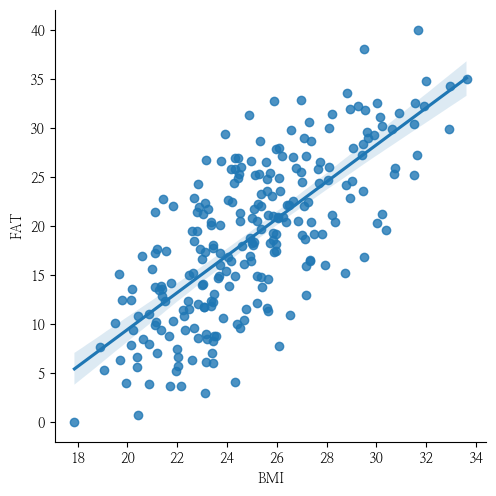

In [17]:
sns.pairplot(df_new, y_vars = 'FAT', x_vars='BMI', kind='reg', height = 5)

In [18]:
df_new = df_new.iloc[:,4:]

### 상관분석

In [19]:
df_new.corr().round(3)

,BMI,FAT
BMI,1.000,0.731
FAT,0.731,1.000


* BMI와 FAT의 상관계수가 0.731로 높은 선형 관계가 있다.

## 선형 회귀 모델 생성

In [20]:
# data split
df_train, df_test = train_test_split(df_new, test_size = 0.4, random_state = 1234)

# 선형 회귀 분석
reg_model = smf.ols(formula = "FAT ~ BMI", data = df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     205.8
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.13e-29
Time:                        19:14:26   Log-Likelihood:                -456.48
No. Observations:                 148   AIC:                             917.0
Df Residuals:                     146   BIC:                             923.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.9903      3.408     -8.800      0.0

* p-value : 0.05보다 매우 작기 때문에 회귀모델로서 유의
* 설명력 : 58.2%

## 오차의 기본가정 검토

### 등분산성 검정

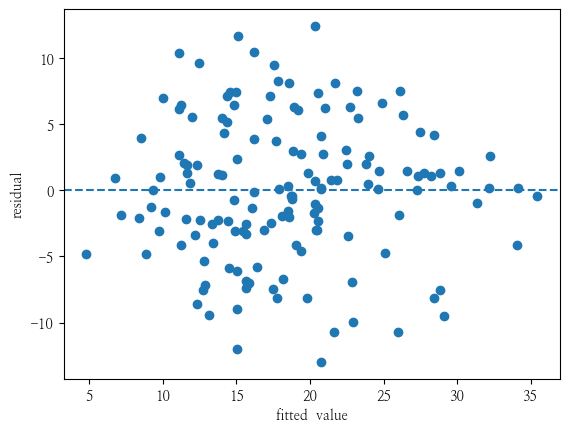

In [21]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted  value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = '--')

* 잔차가 Y=0을 기준으로 random하게 산포되어 있어 등분산성을 만족하는 것으로 볼 수 있다.

### 정규성 검정

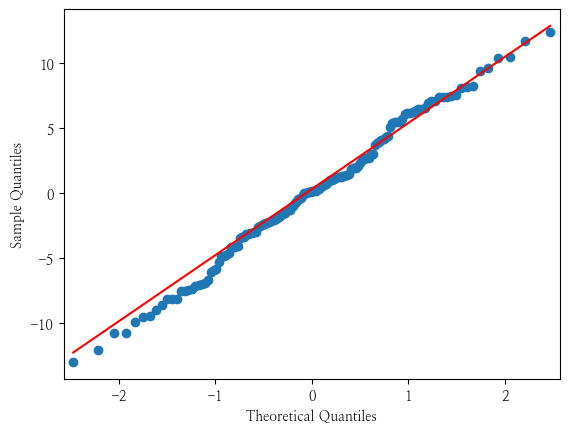

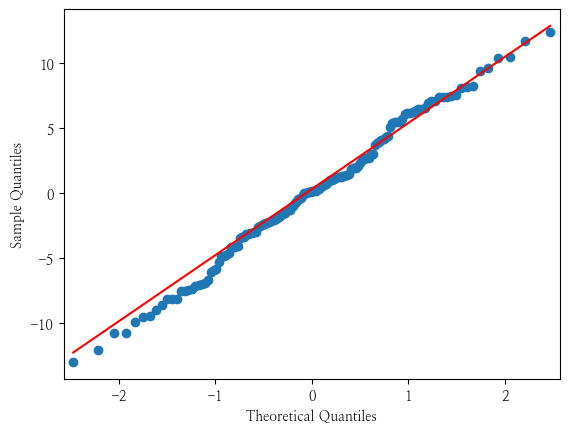

In [22]:
qqplot(reg_result.resid, line = "q")

* 정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따른다.

### 독립성 검정

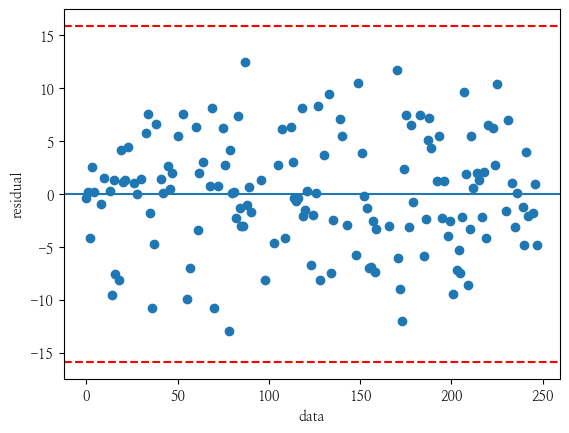

In [23]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("data")
plt.ylabel('residual')
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle='--', color = 'red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle='--', color = 'red', label='LCL')

* 잔차가 y=0을 기준으로 관리상하한(UCL, LCL)을 벗어나지 않고 Random하게 산포되어 있어 독립성을 만족한다고 볼 수 있다.

## 결론

BMI와 FAT의 선형 회귀식  
> Y[FAT] = 1.946*X[BMI] - 29.9903  
> BMI 지수가 1단위 증가할 때마다 FAT(체내 지방함량)는 1.946kg 증가

(선형회귀식 적용 예시)  
> 철수는 BMI 지수가 21이었다. 하지만 코로나 확진으로 운동을 소홀히 하여 BMI지수가 25까지 증가하였다.  
> 이때 철수의 증가한 지방은 얼마나 되는가?  
  
> 코로나 확진 전 지방함량 추정치 = 10.876kg  
> 코로나 확진 후 지방함량 추정치 = 18.660kg  
> 운동 부족으로 인하여 체내에 7.78kg의 지방이 축적되었다.